<a href="https://colab.research.google.com/github/gnaprs/DataScience_MarionPang/blob/master/Quiz2_MarionPang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quiz 2
## Marion Pang (gnaprs)

### Question 1

Consider a minimizing $\sum_{i=1}^{n}{(Y_i-\beta_1X_{i1}-\beta_2X_{i2}-...-\beta_pX_{ip})^2}$ where each $X_{ik}$ of the form $X_{ik}=I(i\in G_k)$.

That is, each $X_{ik}$ is 1 if unit $i$ is in group $k$. For example, $i$ could be a person and group $k$ is a characteristic, like a category of sleep disorder (none, mild, moderate, severe) and $Y_i$ is an outcome, say blood pressure.  Argue that the prediction for a person in group $k$ is $\bar{Y}_k$. That is, the outcome mean for subjects in group $k$. The $Y_i$ were not centered.  (Hint, try breaking up the sum into groups. Use any fact we’ve established in class.)

#### Answer:
We can rewrite $X_i$ as
$$\begin{equation}
  X_{i1}=
    \begin{cases}
      1 & \text{$G_1$}\\
      0 & \text{Otherwise}
    \end{cases}       
\end{equation}$$ 
$$\begin{equation}
  X_{i2}=
    \begin{cases}
      1 & \text{$G_2$}\\
      0 & \text{Otherwise}
    \end{cases}       
\end{equation}$$
$$\vdots$$
$$\begin{equation}
  X_{ik}=
    \begin{cases}
      1 & \text{$G_k$}\\
      0 & \text{Otherwise}
    \end{cases}       
\end{equation}$$

Splitting up the sums, we obtain

$$\sum_{G_1}(Y_i-\beta_1)^2+\sum_{G_2}(Y_i-\beta_2)^2+...+\sum_{G_k}(Y_i-\beta_k)^2$$

To minimize the total sum, we can minimize the sum of each group with its best predictor. From the formula for $\hat{\beta}$, subbing in $x_i = 1$ we have
$$\hat{\beta}=\frac{\sum y_ix_i}{\sum {x_i}^2}=\frac{\sum y_i}{n}=\bar{y}$$

Thus, we can obtain $\hat{\beta}$ for each group
$$\therefore \hat{\beta}_1=\bar{y}_1,\hat{\beta}_2=\bar{y}_2,...,\hat{\beta}_k=\bar{y}_k$$

### Question 2

Load in the Kirby 21 data. Use a linear regression model to predict the left diencephalon volume from the right (type I level I). Report your regression coefficients and the in-sample error rate. (Don’t split the data in this example, there aren’t enough subjects for that.)  The in sample error rate is
$$\sum_{i=1}^{n}(Y_i-\hat{\beta}_0-\hat{\beta}_1X_i)^2$$ in the data used for fitting. (The sum of the squared errors for the observed data.)  Create a scatterplot of the data and show your fitted regression line.

#### Code for Q2

In [0]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

! if [ ! -e kirby21.csv ] ; \
  then wget https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv; \
fi

LinregressResult(slope=1.0675677731655153, intercept=-694.180922147847, rvalue=0.9627048718978265, pvalue=1.157832145522277e-11, stderr=0.07071630900773986)
In sample error rate:  832740.3005383221


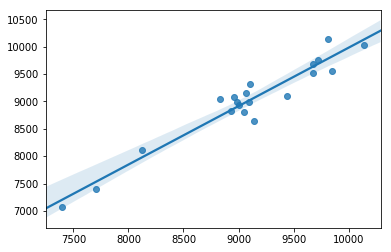

In [48]:
# data manipulation
data1 = pd.read_csv("/content/kirby21.csv").drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'], axis=1)

volL=data1[data1['roi']=="Diencephalon_L"]["volume"].values
volR=data1[data1['roi']=="Diencephalon_R"]["volume"].values

# linear regression, predicting left from right
slope, intercept, r_value, p_value, std_err=st.linregress(x = volR, y = volL)
print(st.linregress(x = volR, y = volL))
sns.regplot(volR, volL)

volLNew = intercept + slope * volR

print("In sample error rate: ", np.sum((volL - volLNew)**2))

### Question 3
Write a two sentence proposal for a project (you won’t be held to this) where you use data to either predict or classify an outcome measure. Some ideas:
1. Predicting health insurance coverage
2. Firearm legislation and shootings
3. Predicting air pollution outcomes
4. Predicting image contents
5. Fashion mnist
Or bring your own. Try searching around for datasets. Keep it simple and not too ambitious. Don’t do MNIST! (handwritten digits)


#### Answer
Fashion mnist is a directory of 70000 (10,000 test, 60,000 training) images corresponding to a specific type of clothing. Fashion mnist is being used as a new benchmarking dataset for image classification machine learning algorithms, and it'll be interesting to apply some of our newly learnt skills to tackle this problem at the end of the semester. The goal of the project would be to correctly identify the correct type of clothing from 10 different possible clothing categories from a BW small clothing image.